## EDA - Proyecto Siniestros Viales de la ciudad de Buenos Aires, Argentina

El Análisis Exploratorio de Datos (EDA) es una fase crucial en el proceso de análisis de datos que busca comprender la naturaleza y las características de un conjunto de datos antes de aplicar modelos más avanzados o llegar a conclusiones. En este proyecto de EDA, nos enfocaremos en un conjunto de datos relacionado con homicidios en siniestros viales en la Ciudad de Buenos Aires durante el período 2016-2021. A través del EDA, exploraremos diferentes aspectos de los datos para extraer información valiosa y patrones significativos. El objetivo principal es proporcionar una visión comprehensiva de los incidentes, identificando tendencias, relaciones y posibles áreas de intervención para mejorar la seguridad vial en la ciudad.

Relacionamos las librearias que requerimos para realizar el proceso de transformación.

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import scipy.stats as stats
import folium
from folium.plugins import HeatMap
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Ajustar la configuración de pandas para mostrar más filas y columnas, esto se realiza para evitar el trucamiento de salidas o muestras del metodo hide() en el editor .
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Se realiza la carga del archivo homicidios.cvs, que es el resultados de las transformaciones realizados en el proceso ETL.

In [5]:
# Leer el archivo CSV y cargarlo en un DataFrame
df_homicidios = pd.read_csv('DataSet/homicidios.csv')

In [6]:
# Mostramos inialmente el contenido del dataframe df_homicidios

df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,Barrio,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,VILLA RIACHUELO,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,No Asignado,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,CONSTITUCION,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,VILLA LUGANO,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,No_Disponible,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,CONSTITUCION,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29


In [7]:
# Mostramos y verificamos las etiquetas y sus respectivos tipos de datos
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   N_VICTIMAS             717 non-null    int64  
 2   FECHA                  717 non-null    object 
 3   AAAA                   717 non-null    int64  
 4   MM                     717 non-null    int64  
 5   DD                     717 non-null    int64  
 6   HORA                   717 non-null    object 
 7   HH                     717 non-null    int64  
 8   LUGAR_DEL_HECHO        717 non-null    object 
 9   TIPO_DE_CALLE          717 non-null    object 
 10  Calle                  717 non-null    object 
 11  Cruce                  717 non-null    object 
 12  Dirección Normalizada  717 non-null    object 
 13  COMUNA                 717 non-null    int64  
 14  Barrio                 717 non-null    object 
 15  XY (CA


****Diccionario de Datos del taframe df_homicidios****

---

***Variable*** | ***Descripción*** | ***Tipo de dato***
--- | --- | ---
Id | Identificador único de cada homicidio | int64
N_VICTIMAS | Número de víctimas en el homicidio | int64
FECHA | Fecha del homicidio | datetime64[ns]
AAAA  | Año | int64
MM | Mes del homicidio | int64
DD | Día del mes del homicidio | int64
HORA | Hora del homicidio en formato HH:MM:SS | object
HH | Franja de horior entero | int64
LUGAR_DEL_HECHO | Lugar donde ocurrió el homicidio | object
TIPO_DE_CALLE | Tipo de calle donde ocurrió el homicidio | object
Calle | Nombre de la calle donde ocurrió el homicidio | object
Cruce | Calle que cruza con la calle donde ocurrió el homicidio | object
Dirección normalizada | Dirección normalizada del lugar del homicidio | object
COMUNA | Comuna donde ocurrió el homicidio | int64
XY (CABA) | Coordenadas X e Y del lugar del homicidio | object
pos X | Coordenada X del lugar del homicidio | float64
pos y | Coordenada Y del lugar del homicidio | float64
PARTICIPANTES | Información sobre los participantes en el homicidio | object
VICTIMA | Información sobre la víctima del homicidio | object
ACUSADO | Información sobre el acusado del homicidio | object
ROL | Información sobre el Rol del acusado del homicidio | object
SEXO | Sexo de la víctima en el homicidio | object
EDAD | Edad de la víctima en el homicidio | int64

---

# Análisis de Outliers

Se realiza la busqueda de datos con valores atípicos.  

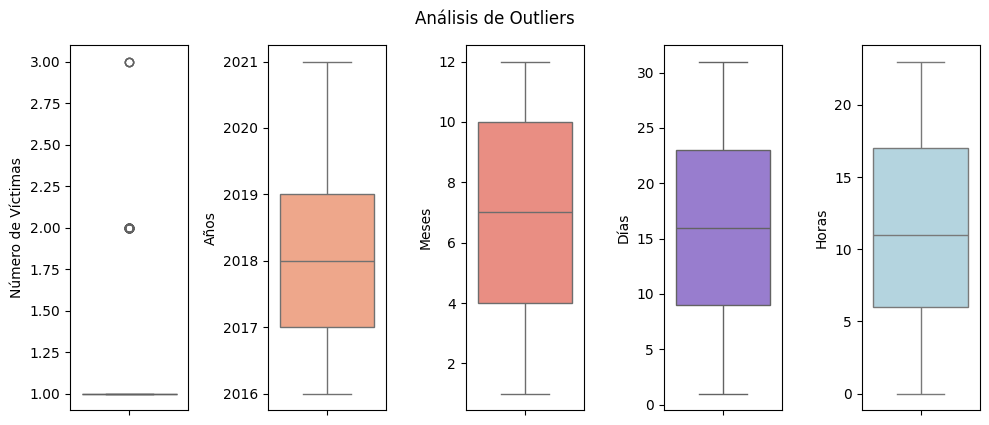

In [8]:
# Implementamos la gráfica
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df_homicidios, y='N_VICTIMAS', color="#FF6347")  # Rojo coral
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df_homicidios, y='AAAA', color="#FFA07A")  # Salmon claro
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df_homicidios, y='MM', color="#FA8072")  # Salmon
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df_homicidios, y='DD', color="#9370DB")  # Púrpura medio
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df_homicidios, y='HH', color="#ADD8E6")  # Azul claro
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Añadir título
plt.suptitle('Análisis de Outliers', y=1.05)

plt.show()


Se concluye que los outliers de Núnero de víctimas valores 2 y 3, son valores extremos, originados por presencia eventual de más de un fallecido en el hecho del siniestro. 

# Estadísticas descriptivas para variables numéricas

In [9]:
# Se analiza las medidas descriptivas para las variables numericas
df_homicidios.describe()

,N_VICTIMAS,AAAA,MM,DD,HH,COMUNA,pos x,pos y,EDAD
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,11.548117,7.430962,-57.382053,-33.992006,42.101813
std,0.257024,1.672655,3.575140,8.674876,6.697535,4.385067,7.803187,4.622508,19.081623
min,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.475768,-34.643577,28.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.442636,-34.622451,39.000000
75%,1.000000,2019.000000,10.000000,23.000000,17.000000,11.000000,-58.399147,-34.594883,55.000000
max,3.000000,2021.000000,12.000000,31.000000,23.000000,15.000000,0.000000,0.000000,95.000000


Se concluye que en efecto se confirma que en la columna N_VICTIMAS, los valores percentiles 25%, 50%, 75% están por debajo del max, adicionalmente la descviación estandar esta muy por debajo de la media, evidenciando y ratificando el hallazgo de outliers en N_VICTIMAS.

La interpretación de las variables numéricas depende del contexto de los datos, se apoya en el mapa de correlaciones para examinar si existen, relaciones entre los datos númericos ó se utilizarán como categóricos (en algunos casos), para el correcto análisis 

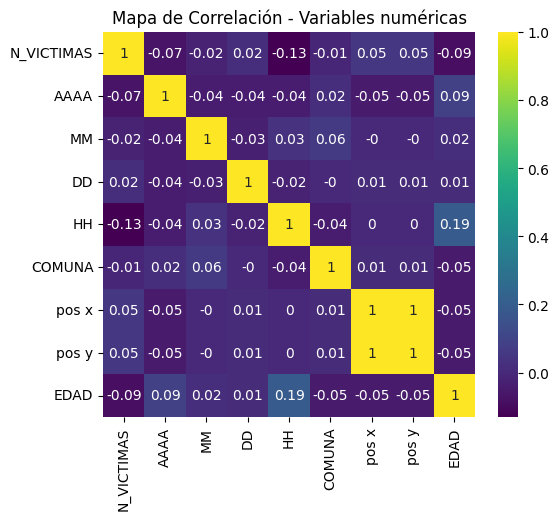

In [10]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df_homicidios.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

In [11]:
# Ver la correlación de los datos numericos mostrado con heapmat, pero de manera matricial
correlation_matrix = dataNumerica.corr().round(2)
print(correlation_matrix)

            N_VICTIMAS  AAAA    MM    DD    HH  COMUNA  pos x  pos y  EDAD
N_VICTIMAS        1.00 -0.07 -0.02  0.02 -0.13   -0.01   0.05   0.05 -0.09
AAAA             -0.07  1.00 -0.04 -0.04 -0.04    0.02  -0.05  -0.05  0.09
MM               -0.02 -0.04  1.00 -0.03  0.03    0.06  -0.00  -0.00  0.02
DD                0.02 -0.04 -0.03  1.00 -0.02   -0.00   0.01   0.01  0.01
HH               -0.13 -0.04  0.03 -0.02  1.00   -0.04   0.00   0.00  0.19
COMUNA           -0.01  0.02  0.06 -0.00 -0.04    1.00   0.01   0.01 -0.05
pos x             0.05 -0.05 -0.00  0.01  0.00    0.01   1.00   1.00 -0.05
pos y             0.05 -0.05 -0.00  0.01  0.00    0.01   1.00   1.00 -0.05
EDAD             -0.09  0.09  0.02  0.01  0.19   -0.05  -0.05  -0.05  1.00


Se puede conluir lo siguiente:

* Coeficiente de correlación positivo: Un valor positivo indica una correlación positiva, lo que significa que a medida que una variable aumenta, la otra variable tiende a aumentar también. Por ejemplo, un coeficiente de 
correlación positivo entre "N_VICTIMAS" y "EDAD" (0.19) sugiere que hay una correlación positiva entre la cantidad de víctimas y la edad de las personas involucradas en los siniestros viales.

* Coeficiente de correlación negativo: Un valor negativo indica una correlación negativa, lo que significa que a medida que una variable aumenta, la otra variable tiende a disminuir. Por ejemplo, un coeficiente de correlación negativo entre "N_VICTIMAS" y "HH" (-0.13) sugiere que hay una correlación negativa entre la cantidad de víctimas y la hora del día en que ocurren los siniestros viales.

* Coeficiente de correlación cercano a cero: Un valor cercano a cero indica una correlación débil o nula entre las dos variables. Por ejemplo, un coeficiente de correlación cercano a cero entre "N_VICTIMAS" y "COMUNA" (-0.01) sugiere que estas dos variables tienen una correlación débil o insignificante.

## Distribución anual de accidentes

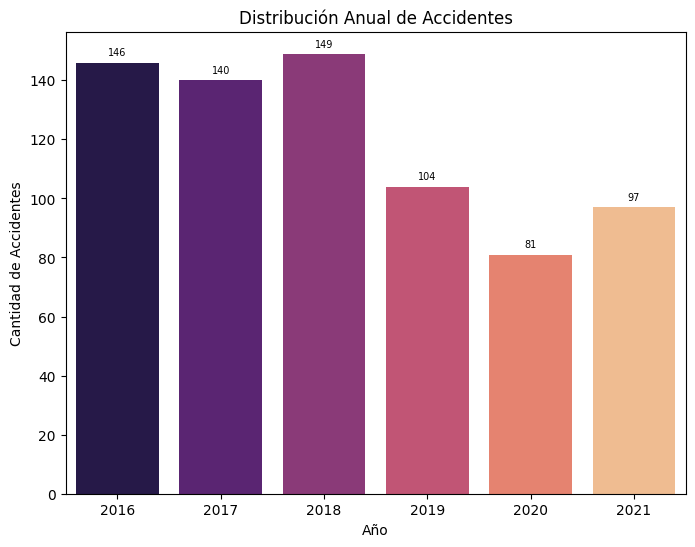

In [12]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(8, 6))

# Crea un gráfico de barras con la cantidad de homicidios por año, utilizando la paleta de colores 'magma'
ax = sns.countplot(x=df_homicidios['AAAA'], palette='magma')

# Establece el título del gráfico
plt.title('Distribución Anual de Accidentes')

# Establece la etiqueta del eje X
plt.xlabel('Año')

# Establece la etiqueta del eje Y
plt.ylabel('Cantidad de Accidentes')

# Itera sobre las barras del gráfico para agregar la cantidad de accidentes sobre cada barra
for p in ax.patches:
    # Anota el valor de la altura de la barra (cantidad de accidentes) sobre ella
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

# Muestra el gráfico
plt.show()

Observemos la distribución anual de accidentes y claramanente indica como alrededor del año 2020, se reduce significativamente por el inicio de la pandemia. Siendo además en su orden los años 2018, 2016y 2017 los años donde se presentaron mayor cantidad de accidentes.

Se muestra la distribución de accidentes año por año como es la tendencia, y recordando  como se reduce el año 2020 por la pandemia.

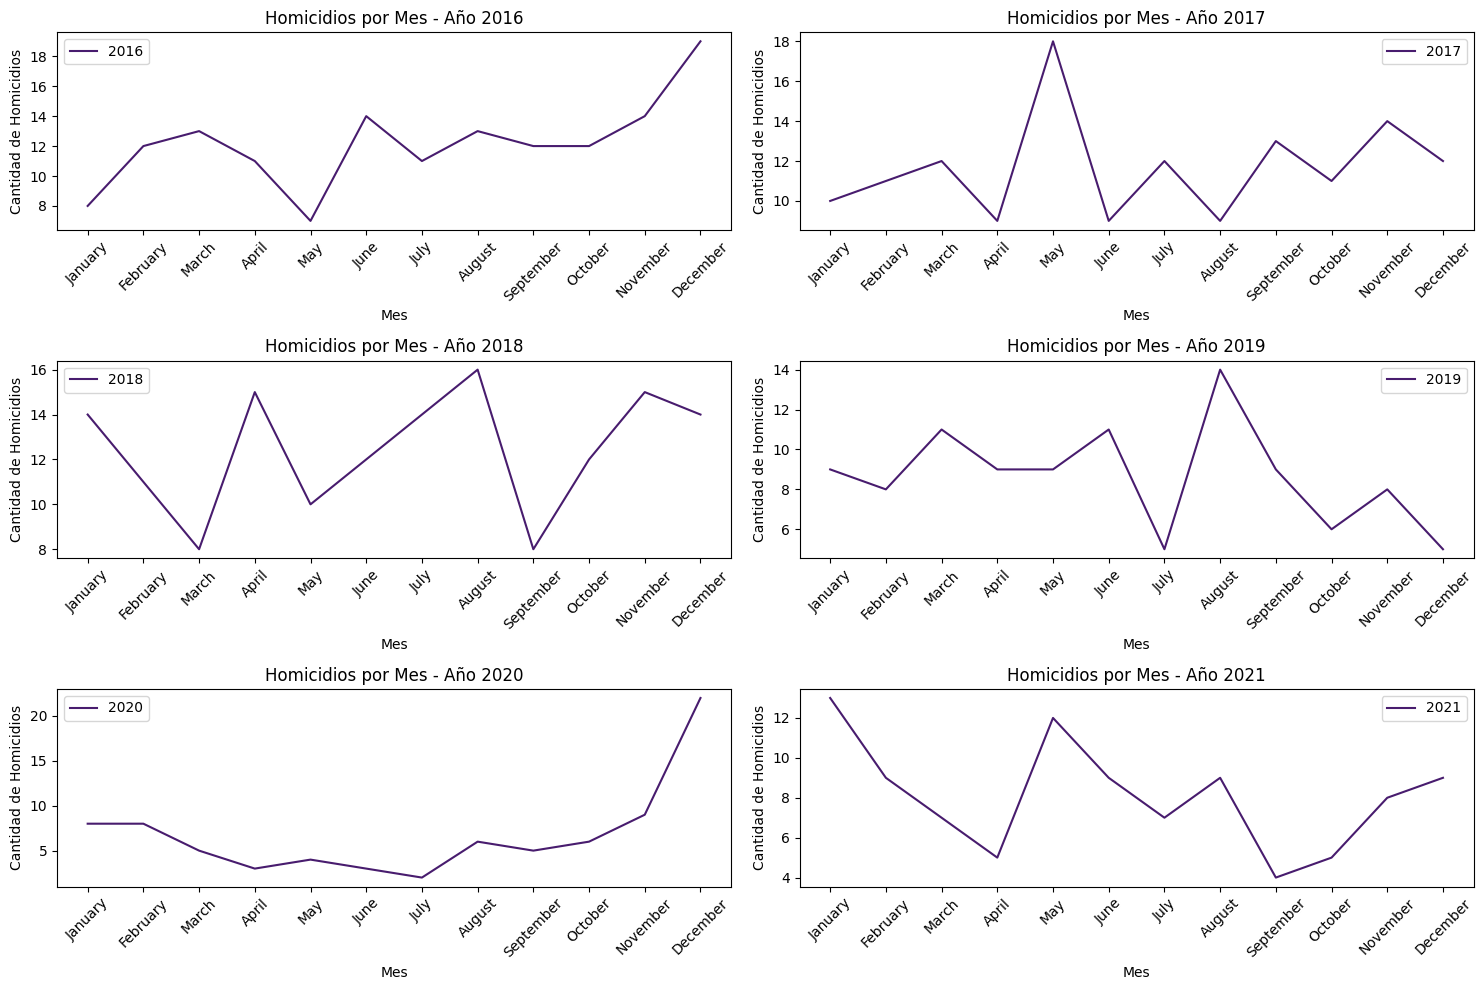

In [13]:

# Configurar el estilo de seaborn para usar los colores de viridis
sns.set_palette("viridis", n_colors=12)

# Asegurarse de que la columna FECHA esté en formato de fecha
df_homicidios['FECHA'] = pd.to_datetime(df_homicidios['FECHA'], format='%Y-%m-%d')

# Crear una nueva columna 'Año' y 'Mes'
df_homicidios['AAAA'] = df_homicidios['FECHA'].dt.year
df_homicidios['MM'] = df_homicidios['FECHA'].dt.month

# Obtener los años únicos presentes en la columna 'Año'
unique_years = sorted(df_homicidios['AAAA'].unique())

# Crear subgráficos en una matriz de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Iterar sobre cada año
for i, year in enumerate(unique_years):
    # Calcular la posición en la matriz
    row = i // 2
    col = i % 2

    # Filtrar el DataFrame para el año actual
    df_year = df_homicidios[df_homicidios['AAAA'] == year]

    # Contar los homicidios por mes
    count_by_month = df_year.groupby('MM').size()

    # Crear el gráfico de líneas
    sns.lineplot(x=count_by_month.index.map(lambda x: calendar.month_name[x]), y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Configurar etiquetas y título
    axes[row, col].set_title(f'Homicidios por Mes - Año {year}')
    axes[row, col].set_ylabel('Cantidad de Homicidios')
    axes[row, col].set_xlabel('Mes')

    # Rotar las etiquetas de los meses a 45 grados
    axes[row, col].tick_params(axis='x', rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Al revisar las gráficas anteriores, no se observa un patrón consistente de accidentes fatales mes a mes a lo largo de los diferentes años; los meses con mayor número de accidentes fatales varían de un año a otro. Sin embargo, se destaca una notable disminución en los accidentes fatales desde diciembre de 2019 hasta noviembre de 2020, probablemente debido a las restricciones de movilidad impuestas durante la cuarentena por la pandemia de COVID-19.

## Distribución geográfica de accidentes

Con el apoyo del mapa, visualizaremos los lugares geográficos de los accidentes por año. En la última línea de código : mapas_por_año[2019] se relaciona el año que se quiere visualizar.

In [14]:
# Obtener los años únicos presentes en la columna 'Año'
unique_years = df_homicidios['AAAA'].unique()

# Crear un diccionario para almacenar los mapas
mapas_por_año = {}

# Iterar sobre cada año
for year in unique_years:
    # Filtrar el DataFrame para el año actual
    df_year = df_homicidios[df_homicidios['AAAA'] == year]
    
    # Crear un mapa centrado en Buenos Aires con un contenedor de tamaño reducido
    fig = folium.Figure(width=1300, height=600)
    mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)
    mapa.add_to(fig)
    
    # Agregar marcadores al mapa para cada accidente del año actual
    for index, row in df_year.iterrows():
        info = f"""
        Accidente: {row['ID']}<br>
        Fecha: {row['FECHA']}<br>
        Sexo: {row['SEXO']}<br>
        Edad: {row['EDAD']}
        """
        folium.Marker(
            [row['pos y'], row['pos x']],
            popup=folium.Popup(html=info, parse_html=True),
            icon=folium.Icon(color='red', icon='warning', prefix='fa')
        ).add_to(mapa)
    
    # Guardar el mapa en el diccionario
    mapas_por_año[year] = mapa

# Mostrar los mapas (por ejemplo, el mapa para el año 2019)
mapas_por_año[2019]

Nos permite ver la localización geográfica de los accidentes registrados por año, por cada punto indica ID del siniestro, fecha, el sexo  y la edad de la víctima.

## Distribución de víctimas fatales por siniestro vial

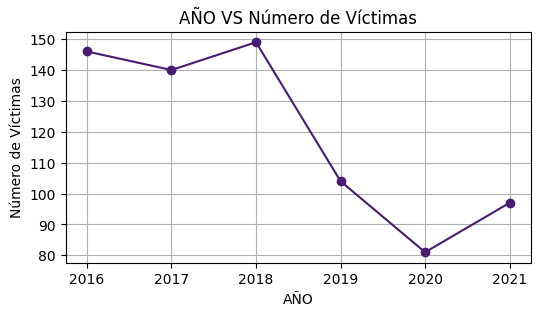

In [15]:
# Agrupa los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = df_homicidios.groupby('AAAA')['N_VICTIMAS'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(6, 3))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.plot(victimas_por_fecha['AAAA'], victimas_por_fecha['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('AÑO VS Número de Víctimas')
plt.xlabel('AÑO')
plt.ylabel('Número de Víctimas')
plt.grid(True)

# Mostrar la gráfica
plt.show()

Tendencia General: Observando la gráfica, se puede identificar si hay una tendencia general en el número de víctimas a lo largo de los años. Por ejemplo, si la línea muestra un aumento o disminución constante, esto indica una tendencia ascendente o descendente respectivamente en el número de víctimas de accidentes fatales en la Ciudad de Buenos Aires.

Picos y Valles: Identificar años específicos en los que el número de víctimas es significativamente mayor o menor que en otros años. Los picos pueden indicar años con eventos excepcionales que aumentaron los accidentes fatales, mientras que los valles pueden reflejar años con mejoras notables en la seguridad vial o cambios en la movilidad urbana.

Efecto de la Pandemia: Si se observa una reducción significativa en el número de víctimas en el año 2020, esto puede estar asociado con las restricciones de movilidad impuestas durante la pandemia de COVID-19. Las cuarentenas y las restricciones de circulación probablemente redujeron la cantidad de tráfico, resultando en menos accidentes fatales.

Evaluación de Políticas de Seguridad Vial: Si en algunos años específicos se observa una disminución en el número de víctimas, esto podría estar relacionado con la implementación de políticas de seguridad vial efectivas o campañas de concientización. Es importante correlacionar estos cambios con las acciones tomadas por las autoridades locales durante esos períodos.

Variabilidad Anual: La gráfica también puede mostrar la variabilidad en el número de víctimas de un año a otro. Una alta variabilidad puede indicar que los factores que afectan los accidentes fatales son numerosos y pueden cambiar significativamente año tras año.

## Distribución de víctimas fatales por Siniestro 

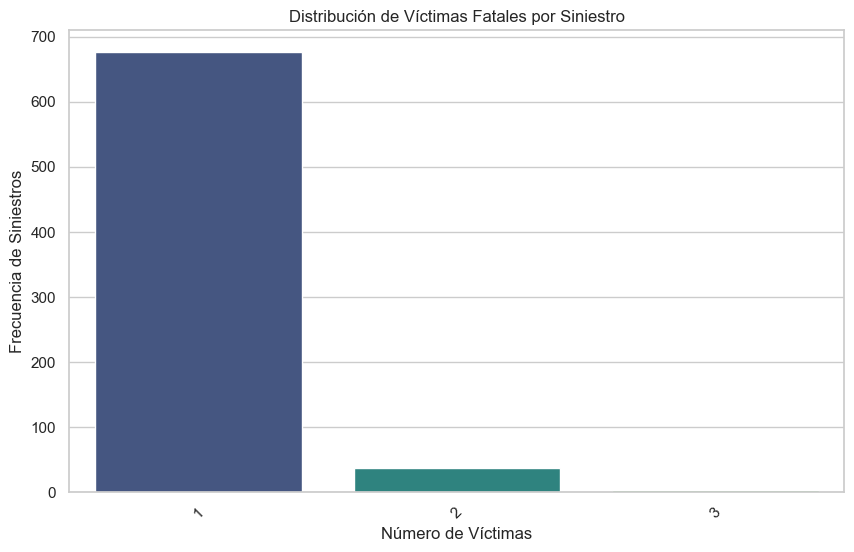

In [16]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Agrupar los datos por número de víctimas y contar la frecuencia de cada grupo
victimas_por_siniestro = df_homicidios['N_VICTIMAS'].value_counts().reset_index()
victimas_por_siniestro.columns = ['N_VICTIMAS', 'FRECUENCIA']

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='N_VICTIMAS', y='FRECUENCIA', data=victimas_por_siniestro, palette='viridis')
plt.title('Distribución de Víctimas Fatales por Siniestro')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia de Siniestros')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

El análisis de los datos de homicidios revela una tendencia constante en la fatalidad, con un promedio de una persona víctima por accidente. La columna 'N_VICTIMAS' muestra que, en general, la mayoría de los incidentes involucran una única víctima. Este patrón sugiere una consistencia en la gravedad de los homicidios, con una prevalencia de situaciones donde solo una persona resulta afectada. esta observación es crucial para entender la dinámica de los homicidios y puede ser valioso para la implementación de estrategias preventivas y medidas de seguridad. La atención continua a este indicador puede ayudar a las autoridades y a la comunidad en general a mejorar la seguridad y reducir el impacto trágico de estos eventos.

La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la mayoría de los casos. Según los datos estadísticos de la columna el 75% de los siniestros viales tienen 1 víctima, y rara vez resulta un siniestro con tres víctimas fatales 

## Distribución de víctimas fatales por Sexo

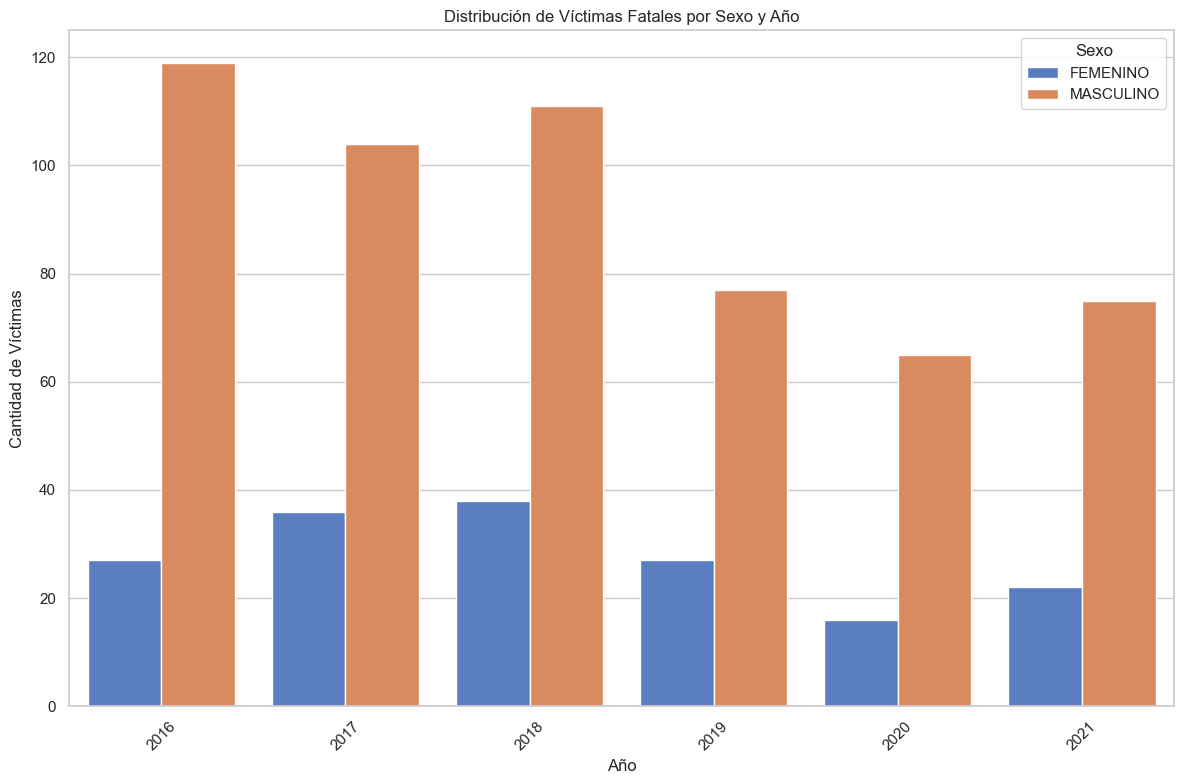

In [17]:
# Agrupar los datos por año y sexo y contar la cantidad de víctimas en cada grupo
victimas_por_sexo_y_anio = df_homicidios.groupby(['AAAA', 'SEXO'])['ID'].count().reset_index()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras apiladas
sns.barplot(data=victimas_por_sexo_y_anio, x='AAAA', y='ID', hue='SEXO', palette='muted')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Víctimas Fatales por Sexo y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Desigualdad en la Distribución: Si el gráfico muestra que un sexo tiene una cantidad significativamente mayor de víctimas fatales que el otro, esto sugiere que un grupo específico es más vulnerable a los siniestros viales. Como se observa, si hay más hombres que mujeres como víctimas fatales, las autoridades podrían enfocar las campañas de seguridad vial hacia el comportamiento y las prácticas de conducción de los hombres. 

Se enfocarse en la edad promedio de las víctimas por año y diferenciar los datos según el género, este análisis busca identificar patrones o tendencias temporales en la victimización, lo cual puede revelar información valiosa sobre la demografía de las víctimas y cómo estas características pueden cambiar a lo largo del tiempo. Tal análisis es crucial para comprender la naturaleza de los homicidios y puede influir en el desarrollo de políticas públicas, estrategias de prevención y esfuerzos de intervención. Utilizando la paleta de colores 'viridis' y ajustes visuales específicos, el gráfico no solo pretende ser informativo sino también estéticamente agradable y claro para interpretar.

# Distribución de las edades de las víctimas segun los años

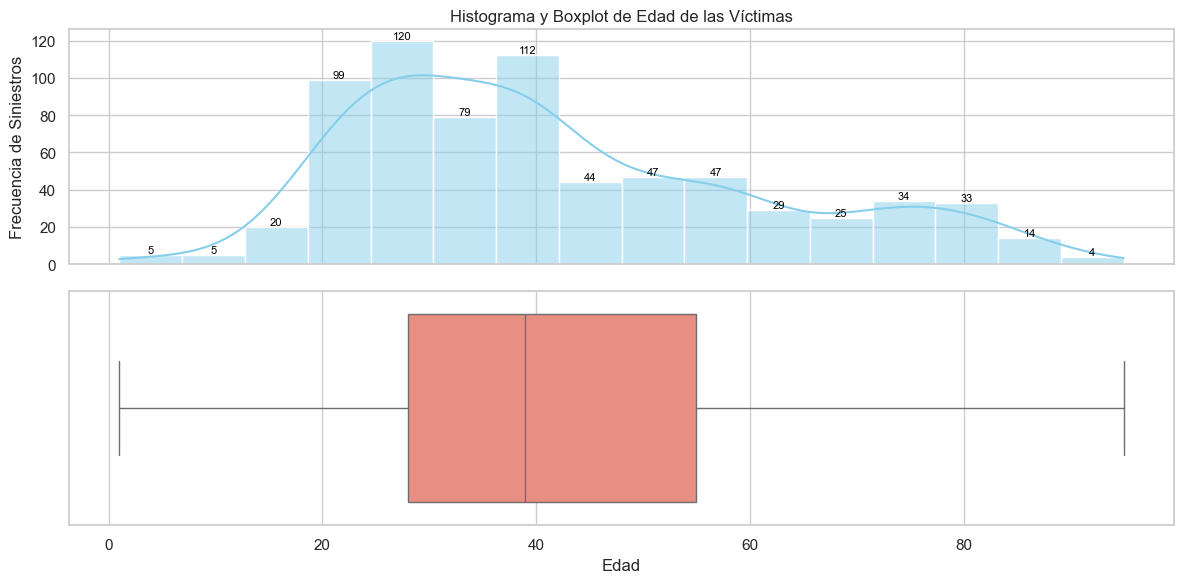

In [18]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df_homicidios['EDAD'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma y Boxplot de Edad de las Víctimas')
ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df_homicidios['EDAD'], ax=ax[1], color='salmon')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

Se observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años. Con respecto a la distribución del histograma, puede concluirse que la mayor cantiad de víctimas fatales se concentra entre los 20 a 40 años de edad

## Distribución de las edades de las víctimas segun los sexos

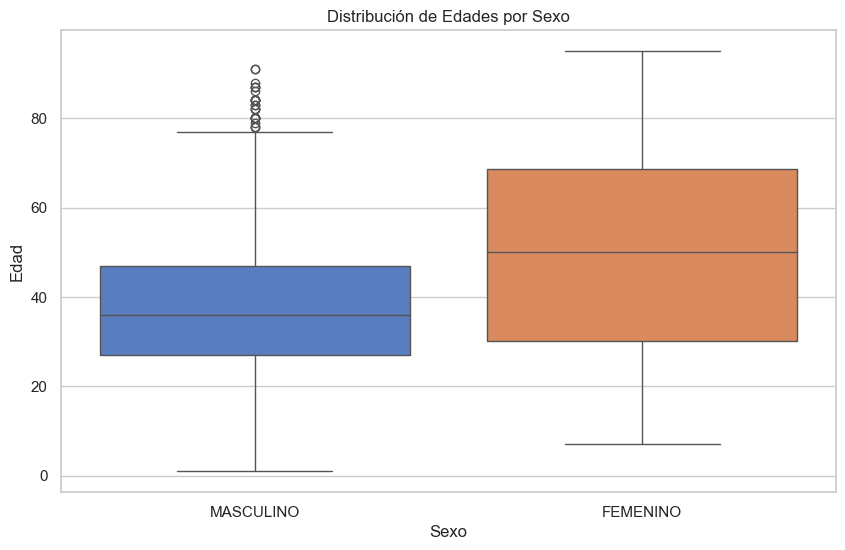

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_homicidios, x='SEXO', y='EDAD', palette='muted')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Edades por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')

# Mostrar la gráfica
plt.show()


las víctima hombres en su mayoria son jovenes, no existe tanta dispersión, la mediana ronda los 35 años, en cambio si son mujeres, por lo general son más adultas, la mediana ronda los 55 años y tiene mayor dispersión que los hombres

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

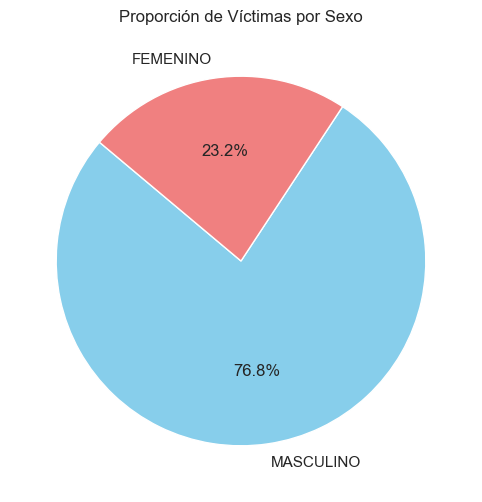

In [20]:
# Calcular la proporción de víctimas por sexo
proporcion = df_homicidios['SEXO'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

Es de notar que la anterior gráfica, denota más las mujeres pero teniendo en cuenta el sexo. En esta, nos indica el comportamiento de distribución general donde se indica que los hombre tienen mayor incidencia en los siniestros viales que las mujeres. 

### Dispersión de las edades segun el rol

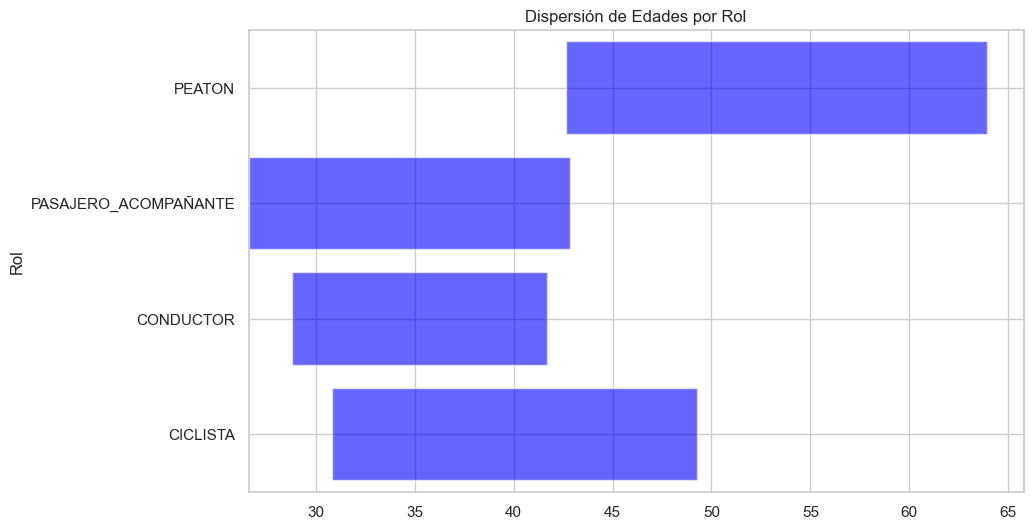

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupa el DataFrame por 'Rol' y calcula la media ('mean') y la desviación estándar ('std') de la columna 'Edad'.
summary_data = df_homicidios.groupby('ROL')['EDAD'].agg(['mean', 'std']).reset_index()

# Prepara una figura y un eje para el gráfico de Matplotlib, estableciendo el espacio para el gráfico que se generará.
fig, ax = plt.subplots(figsize=(10, 6))

# Itera a través de cada fila del DataFrame resumen para dibujar una barra horizontal por cada rol.
# La barra representa la dispersión de edades (desviación estándar) alrededor del promedio, ajustando la posición de la barra para centrarla en el promedio.
for index, row in summary_data.iterrows():
    rol = row['ROL']
    edad_promedio = row['mean']
    dispersion = row['std']

    # Dibuja cada barra horizontal. La posición de inicio de cada barra se ajusta para centrarla en el promedio de edad.
    ax.barh(rol, dispersion, left=edad_promedio-dispersion/2, color='blue', alpha=0.6)

# Configura la etiqueta del eje Y y el título del gráfico para proporcionar contexto.
ax.set_ylabel('Rol')
ax.set_title('Dispersión de Edades por Rol')

# Ajusta el rango del eje Y para mejorar la visualización.
ax.set_ylim(-0.5, len(summary_data)-0.5)

# Muestra el gráfico finalizado. Esta línea es esencial para que el gráfico se renderice y sea visible.
plt.show()

Los conductores y los pasajeros acompañantes tienen edades promedio similares, aproximadamente 35 años. Se registra que la edad mínima para los conductores es alrededor de los 20 años, mientras que en los otros roles se pueden encontrar víctimas más jóvenes, incluyendo niños que son transportados. Para los peatones, la variabilidad de las edades es más amplia, pero apuntando a adultos y adultos mayores mayoritariamente. Los roles de conductor y pasajero acompañante se presentan algunas edades atípicas, estas se encuentran dentro de un rango esperable y se tratan como casos particulares dentro del conjunto de datos.

## Dispersión de siniestros VS  Comunas

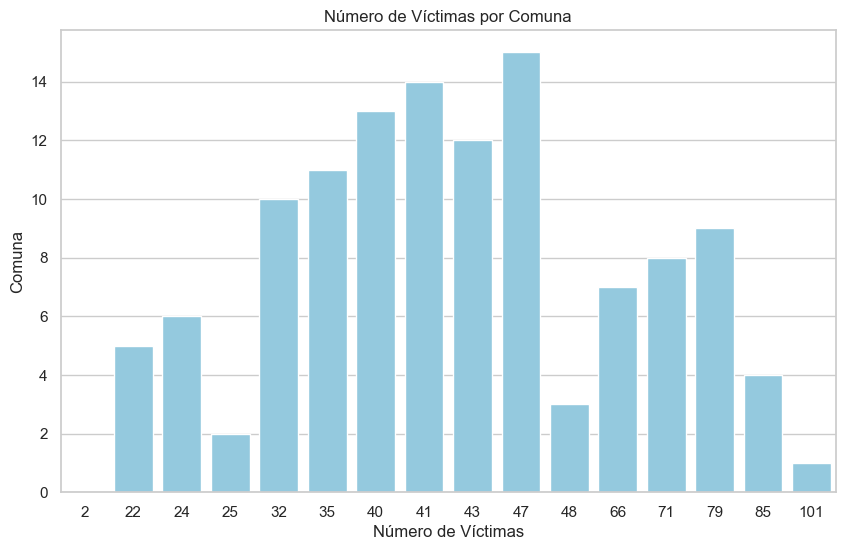

In [22]:
# Agrupa el DataFrame por 'COMUNA' y calcula la suma de 'N_VICTIMAS' en cada comuna
victimas_por_comuna = df_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras
sns.barplot(x='N_VICTIMAS', y='COMUNA', data=victimas_por_comuna, color='skyblue')

# Añade un título y etiquetas de los ejes
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Número de Víctimas')
plt.ylabel('Comuna')

# Muestra el gráfico
plt.show()

Este grafico se relaciona desde los años 2016 - 2021 donde se visualiza 15 comunas que conforman los distintos barrios de CABA. Cada comuna esta formada por uno o varios Barrios.
Se observa además, que la mayor cantidad de víctimas fatales están en las Comunas 1, 4, 9, 8 y 7. La comuna 1 supera por 16 en víctimas a la comuna 4, que le sigue en orden. 
Se consideraría ser comunas donde existan vías muy transitadas.

## Análisis de las vías donde se presentan los siniestros

En el análisis de la cantidad de víctimas con siniestros, se ilustra cómo la distribución de las víctimas varía según 


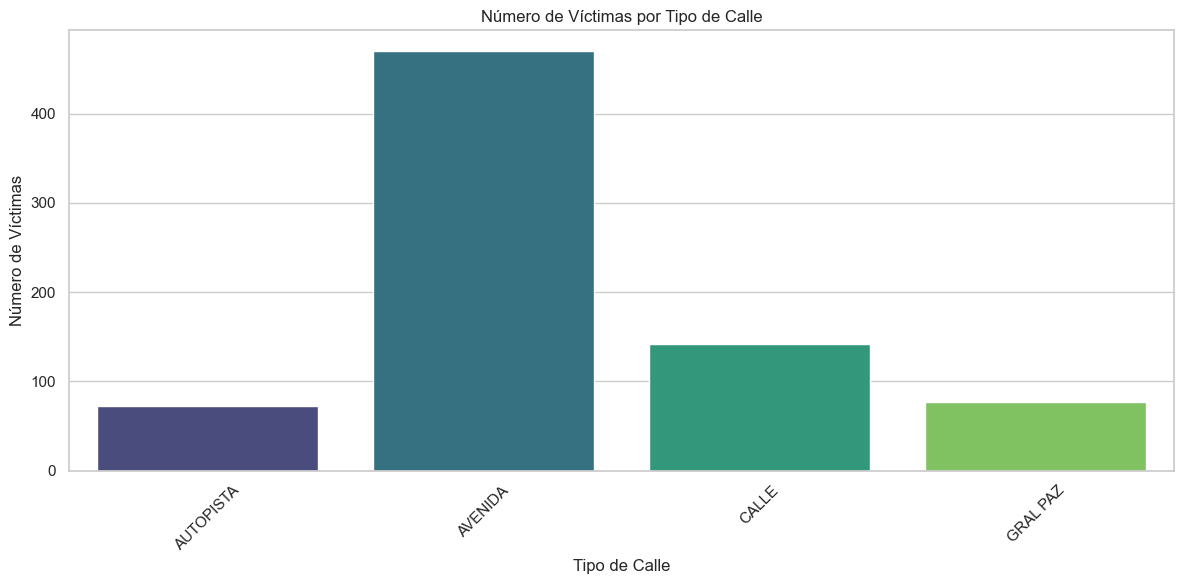

In [23]:

# Agrupar los datos por TIPO_DE_CALLE y sumar las víctimas
tipo_calle_vs_victimas = df_homicidios.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='TIPO_DE_CALLE', y='N_VICTIMAS', data=tipo_calle_vs_victimas, palette='viridis')

# Personalizar el gráfico
plt.title('Número de Víctimas por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se muestra que las avenidas son los lugares donde se concentra una mayor cantidad de accidentes con víctimas fatales. Esto sugiere que las avenidas presentan riesgos significativos para la seguridad vial, posiblemente debido a factores como el alto flujo de vehículos, la mezcla de distintos tipos de tráfico (como peatones, bicicletas y vehículos motorizados), y la complejidad de las señalizaciones y normas de tránsito. Estas áreas, al ser puntos de convergencia de diferentes direcciones y velocidades, aumentan las probabilidades de conflictos y colisiones, subrayando la importancia de implementar medidas de seguridad y regulaciones específicas para mitigar los riesgos y proteger a los usuarios de la vía.

## Análisis de Víctimas VS Tipo de participantes del Vehículo

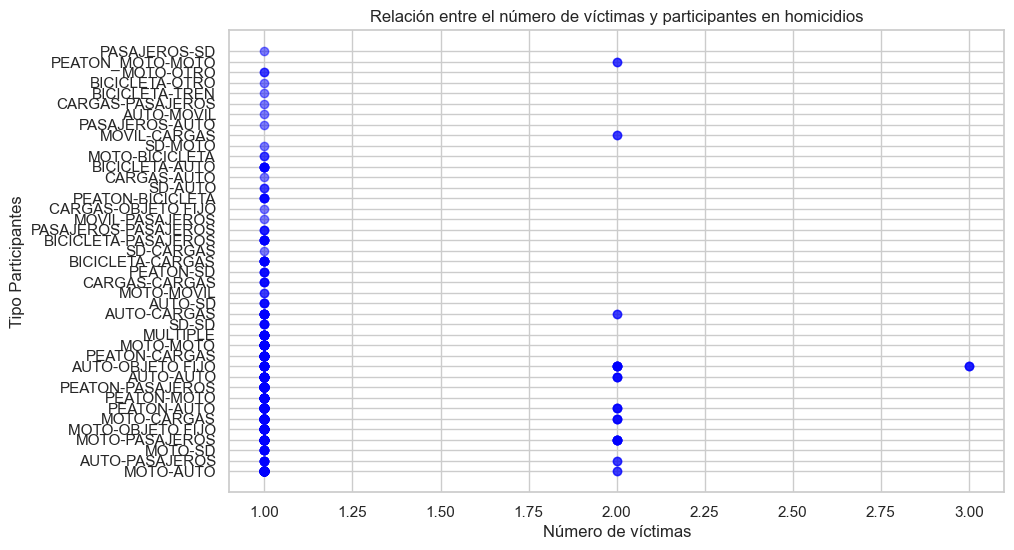

In [24]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(df_homicidios['N_VICTIMAS'], df_homicidios['PARTICIPANTES'], color='blue', alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre el número de víctimas y participantes en homicidios')
plt.xlabel('Número de víctimas')
plt.ylabel('Tipo Participantes')

# Mostrar la gráfica
plt.grid(True)
plt.show()

De acuerdo a la gráfica, se observa que la mayoría de los homicidios tienen una cantidad de víctimas que tiende a ser baja a 1. Sin embargo, el rango puede variar, como lo indica el valor máximo de 3 víctimas y en tipo de peaton-pasajero.

## Análisis de relación entre las Víctimas y el Rol

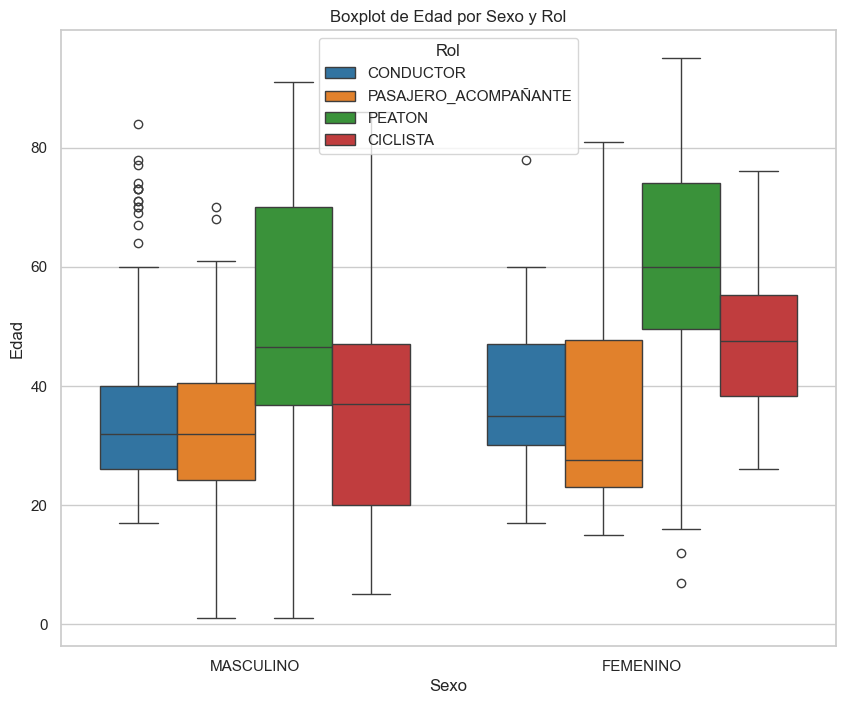

In [25]:
# Filtrar los datos para obtener solo las columnas 'EDAD', 'SEXO' y 'ROL'
datos_filtrados = df_homicidios[['EDAD', 'SEXO', 'ROL']]

# Definir una paleta de colores
paleta_colores = sns.color_palette("tab10", len(datos_filtrados['ROL'].unique()))

# Graficar el boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='SEXO', y='EDAD', hue='ROL', data=datos_filtrados, palette=paleta_colores)
plt.title('Boxplot de Edad por Sexo y Rol')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.legend(title='Rol')
plt.show()

Observando las edades según roles y sexos se puede ver que los peatones son en general personas adultas y adultos mayores, principalmente las mujeres.
Cuando se trata de un conductor por lo general son hombres jóvenes y mujeres adultas. Cuando son acompañantes se comportan de manera similar y en su mayoría son jóvenes o adultos. Los ciclistas son hombres jóvenes y mujeres adultas principalmente.

## Análisis de Víctimas con relación a los horarios

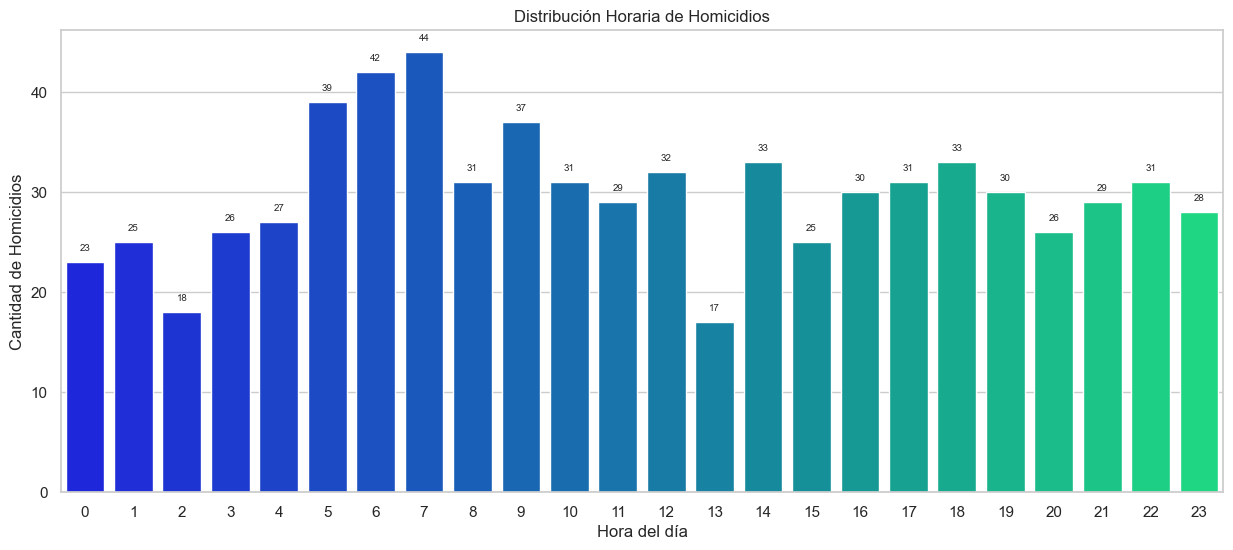

In [26]:
# Graficar la distribución con colores específicos
plt.figure(figsize=(15, 6))

ax = sns.countplot(x=df_homicidios['HH'], palette='winter')
plt.title('Distribución Horaria de Homicidios')

plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Homicidios')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", xytext=(0, 10), textcoords="offset points", fontsize=7)

# Ajustar el tamaño del texto aquí
plt.show()

Los horarios de mayor cantidad de siniestros son entre las 5am y las 9am que son horarios de despliegue laboral con transporte urbanos, autos , motos, bicicletas, peatones etc. Los horarios entre las 16 y las 19 horas que suponen el regreso de la población a sus hogares.

## Relación de Víctimas con los Siniestros

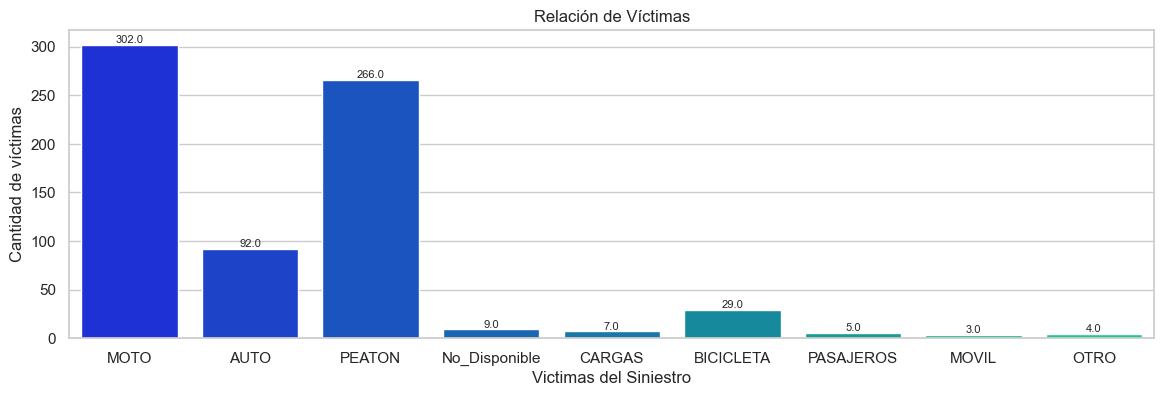

In [27]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df_homicidios, x="VICTIMA", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Relación de Víctimas')

plt.show()

Se observa que las víctimas se presentan en mayor proporción en Moto, Peaton y autos.

In [28]:
# Generar matrix de cinfusión para apoyar más el análisis.
tabla_contingencia = pd.crosstab(df_homicidios['VICTIMA'], df_homicidios['ACUSADO'])

# Visualizar la tabla de contingencia
tabla_contingencia

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,No_Disponible,OBJETO FIJO,OTRO,PASAJEROS,TREN
VICTIMA,,,,,,,,,,
AUTO,33,0,15,0,3,4,26,1,10,0
BICICLETA,8,0,10,0,1,0,0,1,8,1
CARGAS,1,0,4,0,0,0,1,0,1,0
MOTO,84,2,80,25,8,9,40,4,50,0
MOVIL,0,0,2,0,0,0,0,0,1,0
No_Disponible,2,0,1,1,0,5,0,0,0,0
OTRO,2,0,0,2,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,1,0,0,3,0
PEATON,79,5,38,30,5,4,0,0,105,0


Se ve que en los casos donde la víctima es un peatón, los acusados son principalmente autos y motos. 
En la mayoría de los casos donde la víctima es un automóvil, tienen acusados que también son automóviles, podría indicar una tendencia específica en los tipos de incidentes.
Se presenta una alta frecuencia de motocicletas involucradas como acusados en casos donde la víctima es un peatón, podría sugerir un cierto tipo de incidentes más comunes.
En algunos casos tienen menos variación en los acusados, como el caso donde la víctima es un 'PASAJERO', donde los acusados son principalmente otros pasajeros y autos.

## Relación de Víctimas con los Barrios de las comunas

Se Implementa una visualización interactiva en el cual se le indica los parámetros de número de comuna, año y mes para ver las victimas reportadas en la comuna para detallar los incidentes por barrio.

In [29]:
# Crear widgets para seleccionar comuna, año y mes
comuna_widget = widgets.Dropdown(
    options=df_homicidios['COMUNA'].unique(),
    description='Comuna:'
)

año_widget = widgets.IntSlider(
    value=df_homicidios['AAAA'].min(),
    min=df_homicidios['AAAA'].min(),
    max=df_homicidios['AAAA'].max(),
    step=1,
    description='Año:'
)

mes_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Mes:'
)

# Función para actualizar el gráfico
def actualizar_grafico(comuna, año, mes):
    # Filtrar el DataFrame según los widgets
    df_filtrado = df_homicidios[(df_homicidios['COMUNA'] == comuna) &
                                (df_homicidios['AAAA'] == año) &
                                (df_homicidios['MM'] == mes)]
    
    # Agrupar por barrio y sumar el número de víctimas
    df_agrupado = df_filtrado.groupby('Barrio')['N_VICTIMAS'].sum().reset_index()
    
    # Crear el gráfico
    fig = px.bar(df_agrupado, x='Barrio', y='N_VICTIMAS',
                 title=f'Número de Víctimas en Comuna {comuna} - {año}/{mes:02d}',
                 labels={'N_VICTIMAS': 'Número de Víctimas', 'Barrio': 'Barrio'})    
    fig.show()

In [30]:
# Crear el interact
interact(actualizar_grafico, comuna=comuna_widget, año=año_widget, mes=mes_widget)

interactive(children=(Dropdown(description='Comuna:', options=(8, 9, 1, 11, 15, 4, 7, 12, 3, 13, 14, 10, 6, 2,…

<function __main__.actualizar_grafico(comuna, año, mes)>

Tasa de Homicidios en Siniestros Viales = (Número de Homicidios en Siniestros Viales / Población Total) * 100,000


## Análisis del primer KPI

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
 Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

In [31]:
# Definir los periodos de los últimos seis meses (segundo semestre de 2021)
inicio_ultimo_semestre = '2021-07-01'
fin_ultimo_semestre = '2021-12-31'

# Definir los periodos del semestre anterior (primer semestre de 2021)
inicio_semestre_anterior = '2021-01-01'
fin_semestre_anterior = '2021-06-30'

# Filtrar los datos para los dos períodos
homicidios_ultimo_semestre = df_homicidios[(df_homicidios['FECHA'] >= inicio_ultimo_semestre) & (df_homicidios['FECHA'] <= fin_ultimo_semestre)]
homicidios_semestre_anterior = df_homicidios[(df_homicidios['FECHA'] >= inicio_semestre_anterior) & (df_homicidios['FECHA'] <= fin_semestre_anterior)]


# Calcular el número total de homicidios en siniestros viales para cada período
numero_homicidios_ultimo_semestre = homicidios_ultimo_semestre['N_VICTIMAS'].sum()
numero_homicidios_semestre_anterior = homicidios_semestre_anterior['N_VICTIMAS'].sum()


# Definir la población total
poblacion_total = 2950000

# Calcular la tasa de homicidios en siniestros viales para cada período
tasa_homicidios_ultimo_semestre = (numero_homicidios_ultimo_semestre / 2950000) * 100000
tasa_homicidios_semestre_anterior = (numero_homicidios_semestre_anterior / 2950000) * 100000


# Calcular la reducción en porcentaje
reduccion_porcentaje = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

# Determinar si la reducción cumple con el objetivo del 10%
objetivo_cumplido = reduccion_porcentaje >= 10

# Mostrar los resultados
print(f"Tasa de homicidios en siniestros viales del segundo semestre de 2021: {tasa_homicidios_ultimo_semestre:.2f} por cada 100,000 habitantes")
print(f"Tasa de homicidios en siniestros viales del primer semestre de 2021: {tasa_homicidios_semestre_anterior:.2f} por cada 100,000 habitantes")
print(f"Reducción en porcentaje: {reduccion_porcentaje:.2f}%")
print(f"¿Se cumplió el objetivo del 10% de reducción? {'Sí' if objetivo_cumplido else 'No'}")


Tasa de homicidios en siniestros viales del segundo semestre de 2021: 1.42 por cada 100,000 habitantes
Tasa de homicidios en siniestros viales del primer semestre de 2021: 1.86 por cada 100,000 habitantes
Reducción en porcentaje: 23.64%
¿Se cumplió el objetivo del 10% de reducción? Sí


## Análisis del segundo KPI

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [32]:
# Filtrar los accidentes mortales con víctimas en moto
accidentes_moto = df_homicidios[df_homicidios['PARTICIPANTES'].str.contains('MOTO', case=False)]

# Definir los periodos del último año y del año anterior
ultimo_año = 2021
año_anterior = 2020

# Filtrar los datos para cada período
accidentes_moto_ultimo_año = accidentes_moto[accidentes_moto['FECHA'].dt.year == ultimo_año]
accidentes_moto_año_anterior = accidentes_moto[accidentes_moto['FECHA'].dt.year == año_anterior]


# Contar el número de accidentes mortales con víctimas en moto para cada período
numero_accidentes_moto_ultimo_año = accidentes_moto_ultimo_año.shape[0]
numero_accidentes_moto_año_anterior = accidentes_moto_año_anterior.shape[0]

# Calcular la reducción en porcentaje
reduccion_porcentaje = ((numero_accidentes_moto_año_anterior - numero_accidentes_moto_ultimo_año) / numero_accidentes_moto_año_anterior) * 100

# Determinar si la reducción cumple con el objetivo del 7%
objetivo_cumplido = reduccion_porcentaje >= 7

# Mostrar los resultados
print(f"Número de accidentes mortales con víctimas en moto en {año_anterior}: {numero_accidentes_moto_año_anterior}")
print(f"Número de accidentes mortales con víctimas en moto en {ultimo_año}: {numero_accidentes_moto_ultimo_año}")
print(f"Reducción en porcentaje: {reduccion_porcentaje:.2f}%")
print(f"¿Se cumplió el objetivo del 7% de reducción? {'Sí' if objetivo_cumplido else 'No'}")

Número de accidentes mortales con víctimas en moto en 2020: 36
Número de accidentes mortales con víctimas en moto en 2021: 46
Reducción en porcentaje: -27.78%
¿Se cumplió el objetivo del 7% de reducción? No


## Propuesta de KPI

Se considera de importancia analizar la distribucción de los siniestros en las avenidas de la ciudad de CABA, mostrando solamente las 10 avenidas dnde se presentan más estos siniestros.

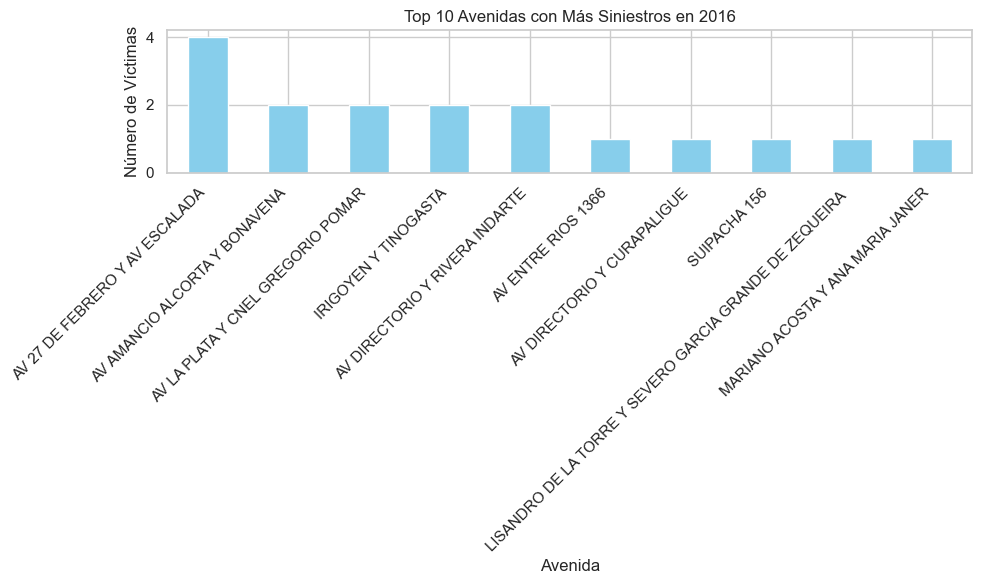

In [33]:
# Asignación del año a consultar
anno = 2016

# Filtrar los datos solo para el año 2021
siniestros_2021 = df_homicidios[df_homicidios['AAAA'] == anno]

# Contar el número de víctimas por avenida
victimas_por_avenida_2021 = siniestros_2021['LUGAR_DEL_HECHO'].value_counts()

# Ordenar las avenidas por número de víctimas en orden descendente
avenidas_mas_siniestros_2021 = victimas_por_avenida_2021.sort_values(ascending=False)

# Seleccionar las 10 primeras avenidas
top_10_avenidas_2021 = avenidas_mas_siniestros_2021.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_avenidas_2021.plot(kind='bar', color='skyblue')
plt.title(f'Top 10 Avenidas con Más Siniestros en {anno}')
plt.xlabel('Avenida')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

Teniendo una perspectiva de los siniestros por año en las avenidas, se plantea el siguiente KPI

### Reducir en un 10% el número de siniestros viales con víctimas mortales en las principales avenidas


### Definición del KPI:

Reducir en un 10% el número de siniestros viales con víctimas mortales que ocurren en avenidas en la ciudad de Buenos Aires, comparado con el año anterior.

Fórmula: Reducir la cantidad de accidentes mortales en avenidas en el último año = ((numero_siniestros_mortales_año_anterior_avenidas - numero_siniestros_mortales_ultimo_año_aavenidas) / numero_siniestros_mortales_año_anterior_avenidas) * 100

### Justificación del KPI:

Relevancia: Las avenidas suelen ser las vías con mayor tráfico y velocidad, lo que aumenta la probabilidad de siniestros viales con consecuencias graves. Reducir los accidentes en estas vías puede tener un impacto significativo en la seguridad vial general.

Medible: Este KPI se puede medir con precisión utilizando los datos existentes sobre la ubicación y gravedad de los siniestros.

Accionable: Permite focalizar esfuerzos en medidas preventivas como mejoras en la infraestructura, control de velocidad y campañas de concientización específicamente en avenidas.

Temporalidad: Evaluar la reducción de siniestros en un periodo anual permite ajustar estrategias y políticas de seguridad vial de manera continua.

### Implementación del KPI:

1. Filtrar los siniestros en avenidas.

2. Contar el número de siniestros viales con víctimas mortales en el último año y en el año anterior.

3. Calcular la reducción porcentual.

4. Determinar si se cumplió el objetivo del 10%.

La propuesta del KPI, ayudará a focalizar los esfuerzos de reducción de siniestros en una de las áreas más críticas de la infraestructura vial urbana, las avenidas, contribuyendo así a mejorar la seguridad general en la ciudad de Buenos Aires.

In [34]:
# Filtrar siniestros en avenidas y con víctimas mortales
siniestros_avenidas = df_homicidios[
    (df_homicidios['TIPO_DE_CALLE'].str.contains('AVENIDA', case=False)) #& (df_homicidios['N_VICTIMAS'] > 0)
]

# Definir los periodos del último año y del año anterior
ultimo_año = 2021
año_anterior = 2020

# Filtrar los datos para cada período
siniestros_avenidas_ultimo_año = siniestros_avenidas[siniestros_avenidas['AAAA'] == ultimo_año]
siniestros_avenidas_año_anterior = siniestros_avenidas[siniestros_avenidas['AAAA'] == año_anterior]

# Contar el número de siniestros viales con víctimas mortales para cada período
numero_siniestros_mortales_ultimo_año = siniestros_avenidas_ultimo_año.shape[0]
numero_siniestros_mortales_año_anterior = siniestros_avenidas_año_anterior.shape[0]

# Calcular la reducción en porcentaje
if numero_siniestros_mortales_año_anterior > 0:
    reduccion_porcentaje = ((numero_siniestros_mortales_año_anterior - numero_siniestros_mortales_ultimo_año) / numero_siniestros_mortales_año_anterior) * 100
    # Determinar si la reducción cumple con el objetivo del 10%
    objetivo_cumplido = reduccion_porcentaje >= 10
else:
    reduccion_porcentaje = None
    objetivo_cumplido = None

# Mostrar los resultados
print(f"Número de siniestros viales con víctimas mortales en avenidas en {año_anterior}: {numero_siniestros_mortales_año_anterior}")
print(f"Número de siniestros viales con víctimas mortales en avenidas en {ultimo_año}: {numero_siniestros_mortales_ultimo_año}")

if reduccion_porcentaje is not None:
    print(f"Reducción en porcentaje: {reduccion_porcentaje:.2f}%")
    print(f"¿Se cumplió el objetivo del 10% de reducción? {'Sí' if objetivo_cumplido else 'No'}")
else:
    print(f"No hay suficientes datos de siniestros viales con víctimas mortales en avenidas para el año {año_anterior} para calcular la reducción.")


Número de siniestros viales con víctimas mortales en avenidas en 2020: 52
Número de siniestros viales con víctimas mortales en avenidas en 2021: 61
Reducción en porcentaje: -17.31%
¿Se cumplió el objetivo del 10% de reducción? No


### Conclusiones Basadas en el Análisis de Datos

Reducción de Accidentes Durante la Pandemia: La distribución anual de accidentes muestra una clara reducción en 2020, coincidiendo con el inicio de la pandemia de COVID-19 y las consecuentes restricciones de movilidad. Este hallazgo destaca cómo las medidas de cuarentena impactaron significativamente en la disminución de la actividad vial y, por ende, en los accidentes.

Variabilidad en los Accidentes Fatales: No se observa un patrón consistente de accidentes fatales mes a mes a lo largo de los años. Sin embargo, desde diciembre de 2019 hasta noviembre de 2020, hubo una notable disminución en los accidentes fatales, probablemente debido a las restricciones de movilidad impuestas durante la pandemia.

Tendencias y Picos Anuales: La tendencia general del número de víctimas de accidentes fatales muestra una variabilidad significativa año tras año. Los años 2018, 2016 y 2017 presentan picos notables en la cantidad de accidentes, lo cual puede estar asociado con factores específicos de esos años.

Consistencia en la Severidad de los Accidentes: El análisis de la información de víctimas, revela que la mayoría de los incidentes fatales involucran una sola víctima. Este patrón sugiere una consistencia en la gravedad de los accidentes, siendo raro que un siniestro resulte en más de una víctima fatal.

Distribución Demográfica de las Víctimas:El 75% de las víctimas fatales son menores de 55 años, con una mediana de 39 años. La mayor concentración de víctimas fatales se encuentra entre los 20 y 40 años. Los hombres, especialmente jóvenes, son más frecuentemente víctimas que las mujeres, quienes suelen ser adultas mayores.

Roles y Edades de las Víctimas: Los conductores y pasajeros acompañantes tienen edades promedio similares, alrededor de 35 años. Los peatones suelen ser adultos y adultos mayores, con una variabilidad más amplia en edades, incluyendo niños en algunos casos.

Distribución Geográfica de los Accidentes: Las comunas con mayor cantidad de víctimas fatales son las Comunas 1, 4, 9, 8 y 7, con la Comuna 1 liderando significativamente. Estas áreas presentan vías muy transitadas, lo que aumenta el riesgo de accidentes.

Accidentes en Avenidas: Las avenidas concentran una mayor cantidad de accidentes fatales, probablemente debido a factores como el alto flujo de vehículos y la complejidad de las señalizaciones y normas de tránsito.

Tipos de Vehículos Involucrados: Las víctimas son principalmente peatones, motociclistas y conductores de automóviles. Los automóviles y motocicletas son los acusados más frecuentes en los accidentes donde la víctima es un peatón.

Horarios de Mayor Riesgo: Los accidentes son más frecuentes en horarios de despliegue y regreso laboral, específicamente entre las 5am y 9am, y entre las 4pm y 7pm.

### Recomendaciones

Implementación de Medidas de Seguridad en Avenidas:Dado que las avenidas son puntos críticos, es vital mejorar las señalizaciones, implementar reductores de velocidad y aumentar la presencia de controles policiales.

Campañas de Concientización y Educación Vial: Desarrollar campañas educativas dirigidas especialmente a los jóvenes, quienes constituyen la mayor proporción de víctimas. Enfocar estas campañas en el uso de motocicletas y el comportamiento de los peatones puede ser particularmente efectivo.

Mejora de la Infraestructura Vial: Aumentar y mejorar la infraestructura para ciclistas y peatones, incluyendo más ciclovías y cruces peatonales seguros, especialmente en las comunas más afectadas.

Políticas de Tráfico y Regulaciones: Fortalecer la aplicación de las leyes de tráfico, especialmente en las horas pico, y considerar sanciones más severas para infracciones graves, como el exceso de velocidad y el uso de dispositivos móviles al conducir.

Uso de Tecnologías Avanzadas: Integrar sistemas de monitoreo del tráfico en tiempo real y promover el uso de vehículos con tecnologías avanzadas de asistencia al conductor para reducir el riesgo de accidentes.

Análisis Continuo de Datos: Establecer sistemas robustos para la recolección y análisis continuo de datos sobre siniestros viales, permitiendo a las autoridades identificar rápidamente las áreas problemáticas y evaluar la efectividad de las medidas implementadas.